### 라이브러리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import qgrid

import seaborn as sns
sns.set(style="ticks", color_codes=True) 

In [2]:
import calendar
from datetime import datetime

In [10]:
from sklearn.model_selection import train_test_split


### 전처리 종류별 정리

In [ ]:
1. Handling Null Values
2. Standardization
3. Handling Categorical Variables (One-Hot Encoding)

In [18]:
from IPython.display import IFrame
IFrame(src='https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d', 
       width=800, height=500)

### 예시

#### 데이터 타입/분포 

In [3]:
current_dir=os.getcwd()
data_dir = os.path.join(os.path.join(current_dir, 'example'),'bike_demand')
data_dir

'C:\\Users\\Daumsoft\\Desktop\\example\\bike_demand'

In [4]:
bike = pd.read_csv(data_dir+'\\bike_train.csv')
bike.head()
#qgrid_widget = qgrid.show_grid(bike, show_toolbar=True)
#qgrid_widget

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [50]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [51]:
def check_columns_dtype(df):
    numerical_columns=list(df.select_dtypes(include='number').columns)
    non_numerical_columns=list(df.select_dtypes(exclude='number').columns)
    dtype_dict = dict(bike.dtypes)
    numerical_columns={col:str(dtype_dict[col]) for col in numerical_columns}
    non_numerical_columns={col:str(dtype_dict[col]) for col in non_numerical_columns}
    dtype_info={}
    dtype_info['numerical']=numerical_columns
    dtype_info['non_numerical']=non_numerical_columns
    return dtype_info

In [52]:
cols_info=check_columns_dtype(bike)
cols_info

{'non_numerical': {'datetime': 'object'},
 'numerical': {'atemp': 'float64',
  'casual': 'int64',
  'count': 'int64',
  'holiday': 'int64',
  'humidity': 'int64',
  'registered': 'int64',
  'season': 'int64',
  'temp': 'float64',
  'weather': 'int64',
  'windspeed': 'float64',
  'workingday': 'int64'}}

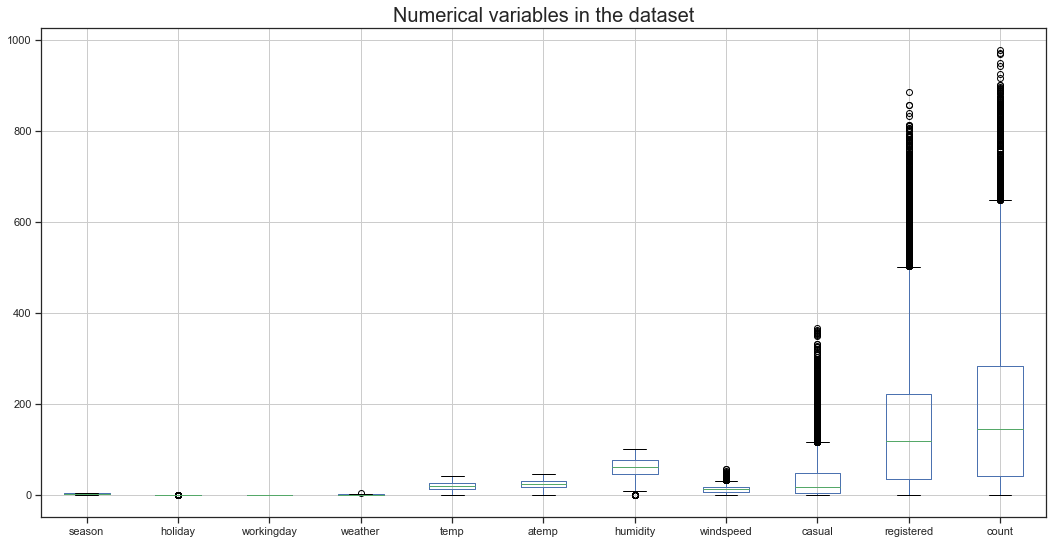

In [10]:
num_cols = list(cols_info['numerical'].keys())
plt.figure(figsize=(18,9),facecolor='white')
bike[num_cols].boxplot()
plt.title("Numerical variables in the dataset", fontsize=20)
plt.show()

In [11]:
def change_dtype(DF, dtype_dict):
    for names in list(dtype_dict.keys()):
        dtype = dtype_dict[names]
        DF[names] = DF[names].astype(dtype)    
    return DF

In [56]:
dtype_dict = {'season':'object', 'holiday':'object', 
              'workingday':'object', 'weather':'object'}
new_bike=change_dtype(bike, dtype_dict)
cols_info=check_columns_dtype(new_bike)
cols_info

{'non_numerical': {'date': 'object',
  'holiday': 'object',
  'hour': 'category',
  'month': 'category',
  'season': 'object',
  'weather': 'object',
  'weekday': 'category',
  'workingday': 'object'},
 'numerical': {'atemp': 'float64',
  'casual': 'int64',
  'count': 'int64',
  'humidity': 'int64',
  'registered': 'int64',
  'temp': 'float64',
  'windspeed': 'float64'}}

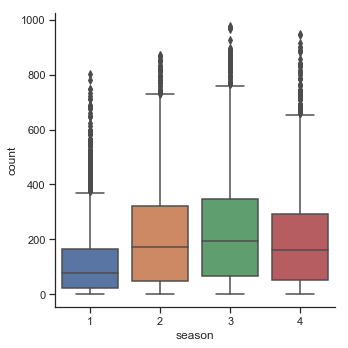

In [14]:
sns.catplot(x="season", y="count", kind="box", data=new_bike);

In [125]:
bike['date'] = bike.datetime.apply(lambda x: x.split()[0])
bike['hour'] = bike.datetime.apply(lambda x: x.split()[1].split(":")[0])
bike['weekday'] = bike.date.apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
bike["month"] = bike.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    bike[var] = bike[var].astype("category")

bike = bike.drop(["datetime"],axis=1)

bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [57]:
cols_info['non_numerical']

{'date': 'object',
 'holiday': 'object',
 'hour': 'category',
 'month': 'category',
 'season': 'object',
 'weather': 'object',
 'weekday': 'category',
 'workingday': 'object'}

#### Handling Null Values

In [42]:
def chech_null_df(df):
    null_check = pd.DataFrame(
        {'total_num':df.isnull().sum(),
        'percentage':(df.isnull().sum()/len(df))*100}
        )
    return null_check

In [43]:
null_check = chech_null_df(bike)
null_check

,total_num,percentage
season,0,0.0
holiday,0,0.0
workingday,0,0.0
weather,0,0.0
temp,0,0.0
atemp,0,0.0
humidity,0,0.0
windspeed,0,0.0
casual,0,0.0
registered,0,0.0


In [105]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


#### model train

In [203]:
train = bike.copy() 

In [204]:
train['date']  = train.datetime.apply(lambda x: x.split()[0])
train['hour'] = train.datetime.apply(lambda x: x.split()[1].split(':')[0])
train["year"] = train.datetime.apply(lambda x : x.split()[0].split("-")[0])
train['weekday'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
train['month'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [205]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
train_set, test_set = train_test_split(train, test_size=0.25, random_state=99)

In [206]:
train_x = train_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
train_y = train_set['count']
test_x = test_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
test_y = test_set['count']

In [207]:
train_x.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
1783,2,0,0,1,16.4,20.455,82,6.0032,05,2011,6,5


In [120]:
train_x.head(1) 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
1783,2,0,0,1,16.4,20.455,82,6.0032,05,2011,6,5


In [208]:
# 평가방법 - RMSLE(Root Mean Squared Logarithmic Error)
## RMSE와 RMSLE의 차이점 
### RMSLE는 예측값과 실제값의 차이에 대한 비율을 측정(실제값보다 예측값이 낮은 경우 패널티를 가함)
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [122]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

LR = LinearRegression()
train_y_log = np.log1p(train_y)
test_y_log = np.log1p(test_y)
LR.fit(X = train_x, y = train_y_log)
preds = LR.predict(X=test_x)
print('RMSLE 값: ',rmsle(np.exp(test_y_log),np.exp(preds),False)) 

RMSLE 값:  0.9762681944426173


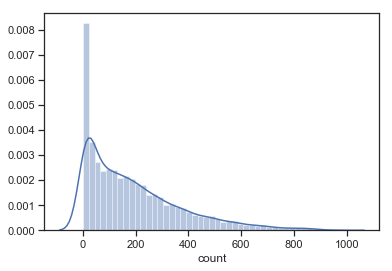

In [20]:
sns.distplot(new_bike['count']);

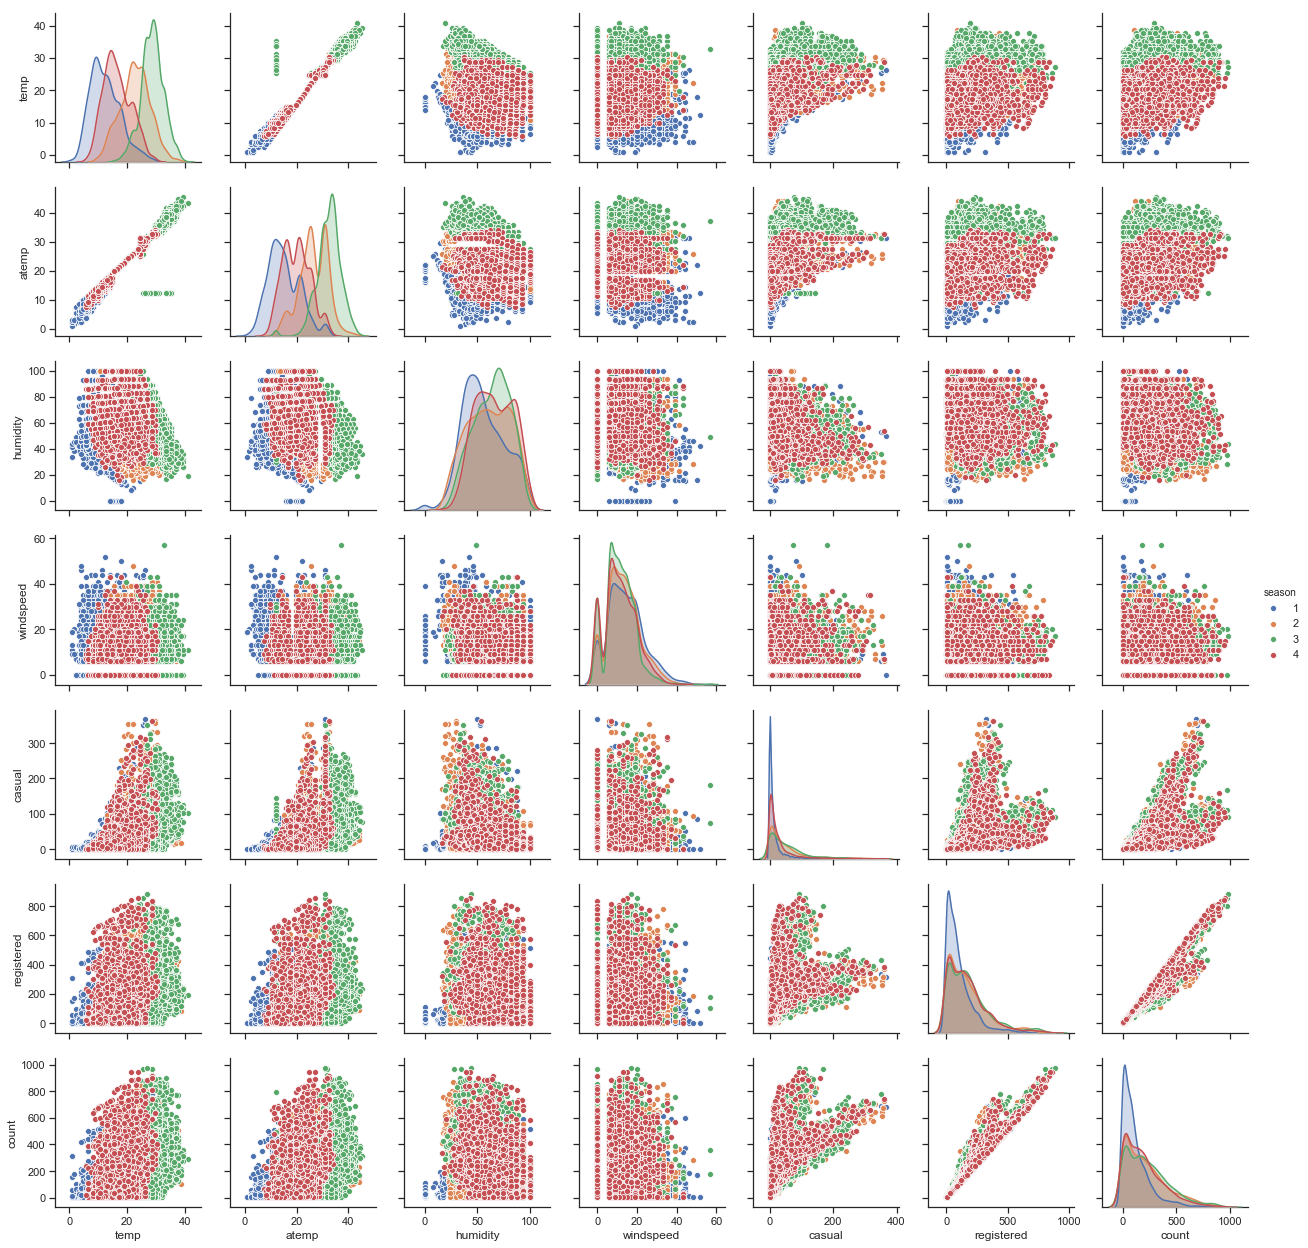

In [33]:
num_cols=list(cols_info['numerical'].keys())
sns.pairplot(new_bike,
            vars=num_cols,
            diag_kind='kde',
            hue='season'
            )

#### Stanarization

In [225]:
bike = pd.read_csv(data_dir+'\\bike_train.csv')
bike.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [226]:
train = bike.copy() 

train['date']  = train.datetime.apply(lambda x: x.split()[0])
train['hour'] = train.datetime.apply(lambda x: x.split()[1].split(':')[0])
train["year"] = train.datetime.apply(lambda x : x.split()[0].split("-")[0])
train['weekday'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
train['month'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,2011,5,1


In [223]:
std = StandardScaler()
train['temp']=std.fit_transform(train['temp'].values.reshape(-1,1))
train['atemp']=std.fit_transform(train['atemp'].values.reshape(-1,1))
train['humidity']=std.fit_transform(train['humidity'].values.reshape(-1,1))
train['windspeed']=std.fit_transform(train['windspeed'].values.reshape(-1,1))
train.head(1)

c:\users\daumsoft\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daumsoft\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,3,13,16,2011-01-01,00,2011,5,1


In [221]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
train_set, test_set = train_test_split(train, test_size=0.25, random_state=99)

train_x = train_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
train_y = train_set['count']
test_x = test_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
test_y = test_set['count']

LR = LinearRegression()
train_y_log = np.log1p(train_y)
test_y_log = np.log1p(test_y)
LR.fit(X = train_x, y = train_y_log)
preds = LR.predict(X=test_x)
print('RMSLE 값: ',rmsle(np.exp(test_y_log),np.exp(preds),False)) 

RMSLE 값:  0.9762681944426173


In [224]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
train_set, test_set = train_test_split(train, test_size=0.25, random_state=99)

train_x = train_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
train_y = train_set['count']
test_x = test_set.drop([
    'casual', 
    'datetime', 
    'date', 
    'registered',
    'count'], axis=1)
test_y = test_set['count']

LR = LinearRegression()
train_y_log = np.log1p(train_y)
test_y_log = np.log1p(test_y)
LR.fit(X = train_x, y = train_y_log)
preds = LR.predict(X=test_x)
print('RMSLE 값: ',rmsle(np.exp(test_y_log),np.exp(preds),False)) 

RMSLE 값:  0.9762681944426177


In [152]:
train_temp_col = temp_col[:8000]
test_temp_col = temp_col[8000:]

In [153]:
train_temp_col.head()

,temp,atemp
0,9.84,14.395
1,9.02,13.635
2,9.02,13.635
3,9.84,14.395
4,9.84,14.395


In [154]:
test_temp_col.head()

,temp,atemp
8000,29.52,32.575
8001,29.52,32.575
8002,28.70,31.820
8003,27.88,31.820
8004,26.24,31.060


In [155]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_temp_col = std.fit_transform(train_temp_col)
test_temp_col = std.transform(test_temp_col)

In [156]:
train_temp_col

array([[-1.22313309, -0.97760384],
       [-1.3305456 , -1.06870271],
       [-1.3305456 , -1.06870271],
       ...,
       [ 1.35476712,  1.20157717],
       [ 1.35476712,  1.20157717],
       [ 1.35476712,  1.20157717]])

In [157]:
test_temp_col

array([[ 1.35476712,  1.20157717],
       [ 1.35476712,  1.20157717],
       [ 1.24735461,  1.11107763],
       ...,
       [-0.68607055, -0.79600542],
       [-0.68607055, -0.614407  ],
       [-0.79348305, -0.70550588]])

In [158]:
np.mean(train_temp_col)

1.1368683772161603e-16

#### categorical data

In [172]:
df = bike.copy()
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [167]:
season_mapping = {1:'spring', 2:'summer', 3:'autumn', 4:'winter'}
df['season']=df['season'].map(season_mapping)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['season'] = class_le.fit_transform(df['season'].values)
df.head()

In [180]:
df_cat = pd.get_dummies(df[['weekday']], drop_first=True)
df_cat

,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


### Train preprocessiong vs Test preprocessing

원칙! 훈련데이터에 적용한 전처리를 동일하게 실험데이터에 해줘야함

In [232]:
# DEPRECATED from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [5]:
bike.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [6]:
df = bike.copy()
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [7]:
df['date']  = df.datetime.apply(lambda x: x.split()[0])
df['hour'] = df.datetime.apply(lambda x: x.split()[1].split(':')[0])
df["year"] = df.datetime.apply(lambda x : x.split()[0].split("-")[0])
df['weekday'] = df.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
df['month'] = df.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
df = df.drop("datetime", axis=1)
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,2011,5,1


In [8]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null category
year          10886 non-null object
weekday       10886 non-null category
month         10886 non-null category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


In [11]:
train, test = train_test_split(df, test_size=0.2)
print(train.shape, test.shape)

(8708, 16) (2178, 16)


In [298]:
#적용할 컬럼에 해당하는 데이터 복사본 생성
new_train = train.drop(["date", "year", "count", "hour","weekday","month","season","weather","holiday","workingday"], axis=1) 
# 또는 특정 컬럼만 선택
#new_train = train[["column_1"]]

In [299]:
new_train.head(1)

,temp,atemp,humidity,windspeed,casual,registered
1821,25.42,30.305,69,8.9981,46,268


In [300]:
imputer.fit(new_train)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [301]:
#imputer는 각 특성의 대체값(중간값)을 계산해서 그 결과를 객체의 staticstics_속성에 저장
#나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확실할 수 없기 때문에,
#모든 수치형 특성에 imputer를 적용해야 한다!!! 
#print(imputer.statistics_)
#print(new_df.median().values)
imput_values = imputer.statistics_
imput_values

array([ 20.5  ,  24.24 ,  62.   ,  12.998,  16.   , 119.   ])

In [302]:
#학습된 imputer 객체를 사용해 훈련데이터에서 누락된 값을 학습한 중간값으로 바꾼다
X = imputer.transform(new_train) # --> 결과는 변형된 특성들이 들어있는 평범한 넘파이 배열 --> 다시 판다스 df로 되돌려야 함
X

array([[ 25.42  ,  30.305 ,  69.    ,   8.9981,  46.    , 268.    ],
       [ 25.42  ,  28.03  ,  88.    ,  16.9979,  16.    , 287.    ],
       [ 26.24  ,  30.305 ,  65.    ,  19.9995,  93.    , 302.    ],
       ...,
       [ 20.5   ,  24.24  ,  77.    ,   0.    ,   1.    ,   2.    ],
       [ 19.68  ,  23.485 ,  44.    ,  19.9995,  20.    , 245.    ],
       [ 13.94  ,  16.665 ,  46.    ,   8.9981,  19.    , 310.    ]])

In [303]:
new_train = pd.DataFrame(X, columns=new_train.columns, index=list(new_train.index.values))
new_train

,temp,atemp,humidity,windspeed,casual,registered
1821,25.42,30.305,69.0,8.9981,46.0,268.0
7966,25.42,28.030,88.0,16.9979,16.0,287.0
9966,26.24,30.305,65.0,19.9995,93.0,302.0
795,18.86,22.725,28.0,27.9993,17.0,65.0
9426,20.50,24.240,68.0,0.0000,10.0,38.0
1739,20.50,24.240,55.0,7.0015,37.0,132.0
3471,29.52,34.850,74.0,16.9979,144.0,233.0
2791,27.06,31.060,69.0,0.0000,1.0,19.0
626,2.46,5.305,49.0,7.0015,4.0,95.0
7787,24.60,31.060,40.0,23.9994,71.0,390.0


In [304]:
train = pd.concat([new_train, train[["date", "year", "count", "hour","weekday","month","season","weather","holiday","workingday"]]], axis=1)
train

,temp,atemp,humidity,windspeed,casual,registered,date,year,count,hour,weekday,month,season,weather,holiday,workingday
1821,25.42,30.305,69.0,8.9981,46.0,268.0,2011-05-02,2011,314,19,0,5,2,2,0,1
7966,25.42,28.030,88.0,16.9979,16.0,287.0,2012-06-12,2012,303,07,1,6,2,3,0,1
9966,26.24,30.305,65.0,19.9995,93.0,302.0,2012-10-19,2012,395,15,4,10,4,1,0,1
795,18.86,22.725,28.0,27.9993,17.0,65.0,2011-02-16,2011,82,14,2,2,1,1,0,1
9426,20.50,24.240,68.0,0.0000,10.0,38.0,2012-09-16,2012,48,03,6,9,3,1,0,0
1739,20.50,24.240,55.0,7.0015,37.0,132.0,2011-04-18,2011,169,09,0,4,2,2,0,1
3471,29.52,34.850,74.0,16.9979,144.0,233.0,2011-08-14,2011,377,13,6,8,3,1,0,0
2791,27.06,31.060,69.0,0.0000,1.0,19.0,2011-07-05,2011,20,05,1,7,3,1,0,1
626,2.46,5.305,49.0,7.0015,4.0,95.0,2011-02-09,2011,99,07,2,2,1,1,0,1
7787,24.60,31.060,40.0,23.9994,71.0,390.0,2012-06-04,2012,461,20,0,6,2,1,0,1


In [306]:
#카테고리데이터의 원핫이코딩
#new_train = train.drop(["date","hour","month","year","count","temp","atemp","humidity","windspeed","casual","registered"], axis=1) 
#new_train.head(1)

,weekday,season,weather,holiday,workingday
1821,0,2,2,0,1


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#encoder=OneHotEncoder()
#one_hot = encoder.fit_transform(new_train) #1차원 배열이면 구조를 바꿔야함 --> 결과는 scipy 희소행렬로 0이 아닌 원소의 위치만 저장
......

In [308]:
#수치형 데이터 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

trans_array = numeric_pipe.fit_transform(numeric_train) #???

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [309]:
#특정 데이터필드만 선택해서 넘파이 배열로 바꾸는 함수
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# 예시
numeric_attrib = ['col1', 'col2']
category_attrib = ['col3']

numeric_pipe = Pipeline([
    ('selector', DataFrameSelector(numeric_attrib)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

numeric_pipe = Pipeline([
    ('selector', DataFrameSelector(numeric_attrib)),
    ('cat_encoder', OneHotEncoder()),
]) 

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [ ]:
full_pipeline = FeatureUnion()